In [61]:
## Project: 2014 Heart Disease Mortality of 500 Random Counties, based on the Concentration of McDonald's Restaurants
## Further Considerations by Gender, Race/Ethnicity, and Income Level

## Data Analysis Notebook

In [62]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [63]:
#Importing Cleaned CDC Data
cdc_pd = pd.read_csv("Final_Clean_CDC_Data.csv")
cdc_pd.head()

,State,County,"Deaths per 100,000",Gender,Race/Ethnicity,Geographical Coordinates
0,AK,"Aleutians East, AK",105.3,Overall,Overall,"(55.440626, -161.962562)"
1,AK,"Aleutians West, AK",211.9,Overall,Overall,"(52.995403, -170.251538)"
2,AK,"Anchorage, AK",257.9,Overall,Overall,"(61.159049, -149.103905)"
3,AK,"Bethel, AK",351.6,Overall,Overall,"(60.924483, -159.749655)"
4,AK,"Denali, AK",305.5,Overall,Overall,"(63.678399, -149.962076)"


In [64]:
# Importing the Dataframe of 500 Random Counties and their number of McDonalds
mcd_pd = pd.read_csv("Mcdonalds_per_County.csv")
mcd_pd.head()


,County,Number of Mcdonalds
0,"Ada County, ID",30
1,"Adams County, CO",50
2,"Adams County, IL",4
3,"Adams County, MS",3
4,"Adams County, ND",1


In [65]:
# Merging the two dataframes so that we have mortality information for only 500 counties
sample_counties = pd.merge(cdc_pd, mcd_pd, on="County")
sample_counties.sort_values("County")

,State,County,"Deaths per 100,000",Gender,Race/Ethnicity,Geographical Coordinates,Number of Mcdonalds
1096,ID,"Ada County, ID",226.1,Female,White,"(43.443315, -116.233977)",30
1098,ID,"Ada County, ID",181.3,Overall,Hispanic,"(43.443315, -116.233977)",30
1097,ID,"Ada County, ID",217.3,Overall,Black,"(43.443315, -116.233977)",30
1101,ID,"Ada County, ID",142.3,Overall,Asian and Pacific Islander,"(43.443315, -116.233977)",30
1095,ID,"Ada County, ID",347.6,Male,White,"(43.443315, -116.233977)",30
1094,ID,"Ada County, ID",278.2,Overall,White,"(43.443315, -116.233977)",30
1093,ID,"Ada County, ID",221.9,Female,Overall,"(43.443315, -116.233977)",30
1092,ID,"Ada County, ID",344.3,Male,Overall,"(43.443315, -116.233977)",30
1099,ID,"Ada County, ID",251.9,Male,Hispanic,"(43.443315, -116.233977)",30
1091,ID,"Ada County, ID",274.5,Overall,Overall,"(43.443315, -116.233977)",30


In [66]:
#Pulling AVERAGE Mortality Rates by Gender to Build Pie Chart Visualizations
genders = ["Male", "Female"]
gender_mort = []

for gender in genders:
        mort = sample_counties.groupby(["Gender"]).get_group((gender))
        tot_mort = mort[(mort["Gender"] == gender) &  (mort["Race/Ethnicity"] == "Overall")]
        tot_mort = tot_mort["Deaths per 100,000"].mean()
        gender_mort.append(tot_mort)


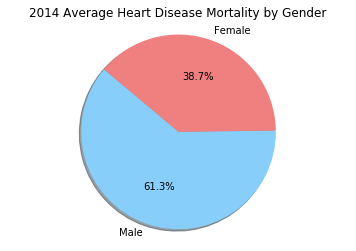

In [67]:
# The colors of each section of the pie chart
colors = ["lightskyblue", "lightcoral"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_mort, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("2014 Average Heart Disease Mortality by Gender")

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("Pie_Mortality_by_Gender_Average.png")

In [68]:
#Pulling AVERAGE Mortality Rates by Race to Build Pie Chart Visualizations
races = ["American Indian and Alaskan Native", "Asian and Pacific Islander", "Black", "Hispanic", "White"]
race_mort = []

for race in races:
        mort = sample_counties.groupby(["Race/Ethnicity"]).get_group((race))
        tot_mort = mort[(mort["Gender"] == "Overall") &  (mort["Race/Ethnicity"] == race)]
        tot_mort = tot_mort["Deaths per 100,000"].mean()
        race_mort.append(tot_mort)


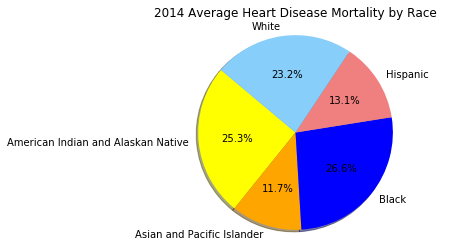

In [69]:
colors = ["yellow", "orange", "blue", "lightcoral", "lightskyblue"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(race_mort, labels=races, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("2014 Average Heart Disease Mortality by Race")

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("Pie_Mortality_by_Race_Average.png")

In [70]:
#Pulling TOTAL Mortality Rates by Race to Build Pie Chart Visualizations
races = ["American Indian and Alaskan Native", "Asian and Pacific Islander", "Black", "Hispanic", "White"]
race_mort = []

for race in races:
        mort = sample_counties.groupby(["Race/Ethnicity"]).get_group((race))
        tot_mort = mort[(mort["Gender"] == "Overall") &  (mort["Race/Ethnicity"] == race)]
        tot_mort = tot_mort["Deaths per 100,000"].sum()
        race_mort.append(tot_mort)

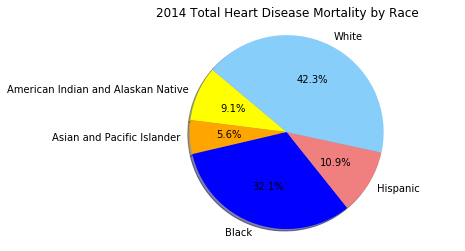

In [71]:
colors = ["yellow", "orange", "blue", "lightcoral", "lightskyblue"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(race_mort, labels=races, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("2014 Total Heart Disease Mortality by Race")

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("Pie_Mortality_by_Race_Total.png")

In [72]:
#Importing Cleaned IRS Data
irs_pd = pd.read_csv("Final_Clean_IRS_Data.csv")

irs_pd.head()

,County,Adjusted Gross Income,Number of Returns,Total Salaries & Wages
0,"Autauga County, AL",Under $1,210.0,1403.0
1,"Autauga County, AL","1 - $9,999",3350.0,14437.0
2,"Autauga County, AL","10,000 - $24,999",5620.0,77486.0
3,"Autauga County, AL","25,000 - $49,999",5410.0,159789.0
4,"Autauga County, AL","50,000 - $74,999",3420.0,163864.0


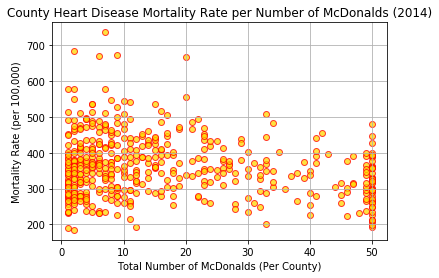

In [74]:
# Pulling Overall Mortality for Scatter Plot
overall_mort = sample_counties.groupby(["Gender"]).get_group(("Overall"))
overall_mort = overall_mort[(overall_mort["Gender"] == "Overall") &  (overall_mort["Race/Ethnicity"] == "Overall")]
tot_mort = overall_mort["Deaths per 100,000"]
tot_mcds = overall_mort["Number of Mcdonalds"]

# Building the Scatter Plot
plt.scatter(tot_mcds, tot_mort, marker="o", facecolors="gold", edgecolors="red", alpha=0.75)

# Labeling the Scatter Plot
plt.xlabel("Total Number of McDonalds (Per County)")
plt.ylabel("Mortality Rate (per 100,000)")
plt.grid()
plt.title("County Heart Disease Mortality Rate per Number of McDonalds (2014)")

# Save Figure
plt.savefig("Scatter_Mortality_by_County.png")

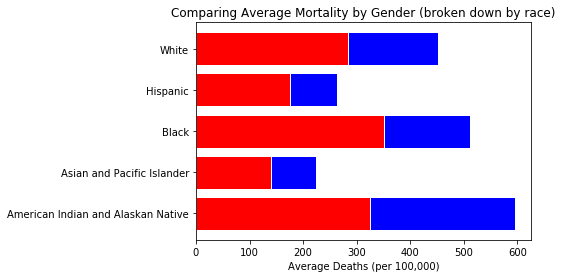

In [81]:
# Creating a Bar Graph showing the AVERAGE Mortality by Race, Further Broken Down by Gender
races = ["American Indian and Alaskan Native", "Asian and Pacific Islander", "Black", "Hispanic", "White"]
genders = ["Male", "Female"]

barmale = []
barfemale = []

for gender in genders:
    for race in races:
        mort = sample_counties.groupby(["Race/Ethnicity"]).get_group((race))
        tot_mort = mort[(mort["Gender"] == gender) &  (mort["Race/Ethnicity"] == race)]
        tot_mort = tot_mort["Deaths per 100,000"].mean()
        if len(barmale) >= 5:
            barfemale.append(tot_mort)
        else:
            barmale.append(tot_mort)

plt.barh(races, barmale, color="blue", edgecolor="white")
plt.barh(races, barfemale, color="red", edgecolor="white")
plt.title("Comparing Average Mortality by Gender (broken down by race)")
plt.xlabel("Average Deaths (per 100,000)")

# Save Figure
plt.savefig("Bar_Avg_Mortality_by_Race-Gender.png")



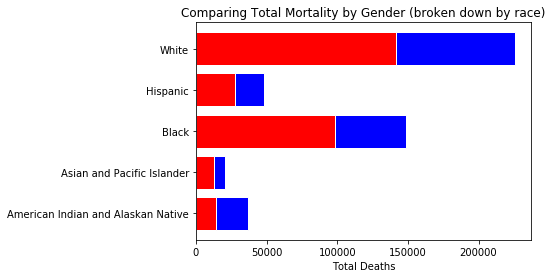

In [80]:
# Creating a Bar Graph showing the TOTAL Mortality by Race, Further Broken Down by Gender
races = ["American Indian and Alaskan Native", "Asian and Pacific Islander", "Black", "Hispanic", "White"]
genders = ["Male", "Female"]

barmale = []
barfemale = []

for gender in genders:
    for race in races:
        mort = sample_counties.groupby(["Race/Ethnicity"]).get_group((race))
        tot_mort = mort[(mort["Gender"] == gender) &  (mort["Race/Ethnicity"] == race)]
        tot_mort = tot_mort["Deaths per 100,000"].sum()
        if len(barmale) >= 5:
            barfemale.append(tot_mort)
        else:
            barmale.append(tot_mort)

plt.barh(races, barmale, color="blue", edgecolor="white")
plt.barh(races, barfemale, color="red", edgecolor="white")
plt.title("Comparing Total Mortality by Gender (broken down by race)")
plt.xlabel("Total Deaths")

# Save Figure
plt.savefig("Bar_Tot_Mortality_by_Race-Gender.png")
    